 # News Articles Analysis 

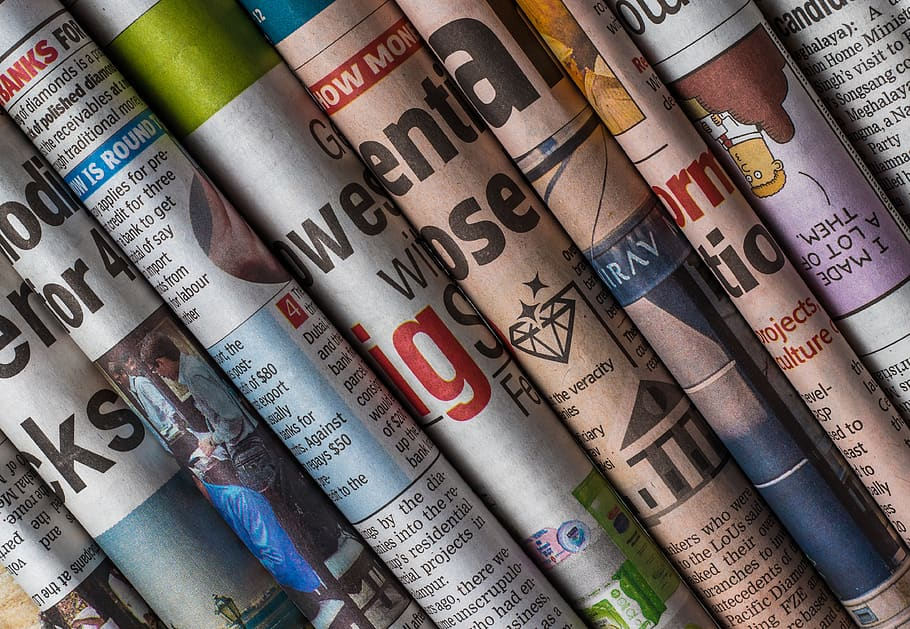

<a id="cont"></a>

### <span style="color:#0077be"><b> Table of Contents
* <b>[1. Project Overview](#chapter1)
    * [1.1 Introduction](#section_1_1)
    * [1.2 Objectives](#section_1_2)
    * [1.3 Importing Packages](#section_1_3)
    * [1.4 Loading Data](#section_1_4)
* <b>[2. Data Cleaning](#chapter2)
    * [2.1 Train Data Cleaning](#section_2_1)
        * [2.1.1 Removing stopwords](#subsection_2_1_1)
        * [2.1.2 Removing punctuation](#subsection_2_1_2)
        * [2.1.3 Removing noise](#subsection_2_1_3)
        * [2.1.4 Tokenization](#subsection_2_1_4)
        * [2.1.5 Stemming](#subsection_2_1_5)
        * [2.1.6 Lemmatization](#subsection_2_1_6)
        * [2.1.7 Removing emojis](#subsection_2_1_7)
        * [2.1.8 Finding frequent words](#subsection_2_1_8)
    * [2.2 Test Data Cleaning](#section_2_2)
        * [2.2.1 Removing stopowrds](#subsection_2_2_1)
        * [2.2.2 Removing noise](#subsection_2_2_2)
        * [2.2.3 Removing punctuation](#subsection_2_2_3)
        * [2.2.4 Removing emojis](#subsection_2_2_4)
        * [2.2.5 Tokenization](#subsection_2_2_5)
        * [2.2.6 Stemming](#subsection_2_2_6)
        * [2.2.7 Lemmatization](#subsection_2_2_7)
        * [2.2.8 Finding frequent words](#subsection_2_2_8)   
* <b>[3. Exploratory Data Analysis (EDA)](#chapter3)
* <b>[4. Data Preproccessing](#chapter4)
* <b>[5. Model Tuning](#chapter5)
* <b>[6. Conclusion](#chapter6)</b>
* <b>[7. References](#chapter7)

## <span style="color:#0077be"><b> 1. Project Overview 

<a id="section_1_1"></a>
## 1.1. Introduction 
>Our group has been tasked with this project to create classification models using Python and deploy it as a web application with Streamlit. 
The aim is to provide you with a hands-on demonstration of applying machine learning techniques to natural language processing tasks.  This end-to-end project encompasses the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment. The primary stakeholders for the news classification project for the news outlet could include the editorial team, IT/tech support, management, readers, etc. These groups are interested in improved content categorization, operational efficiency, and enhanced user experience.

## 1.2. Objectives <a class="anchor" id="section_1_2"></a>
>Streamlined Workflow: Create an end-to-end machine learning workflow that includes data loading, preprocessing, model training, evaluation, and deployment to streamline the process for data scientists and engineers.

>Accurate Classification: Develop and deploy machine learning models that accurately classify news articles into predefined categories to assist the editorial team in better organizing and managing content.

>Hands-On Learning: Provide a comprehensive, hands-on demonstration of applying natural language processing (NLP) and machine learning techniques to real-world data, facilitating learning and skill development for the team.

>Significantly enhance the efficiency and effectiveness of the news outlet's content management and delivery, benefiting all primary stakeholders involved.

## 1.3. Importing Packages <a class="anchor" id="chapter2"></a>
#### We import necessary packages for data manipulation and analysis
+ For data manipulation and analysis, `Pandas` and `Numpy`.
+ For data visualization, `Matplotlib` and `Seaborn`.


In [63]:
# Importing packages for data manipulation and analysis
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from collections import Counter
# import contractions
# from langdetect import detect
#from textblob import TextBlob
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from wordcloud import WordCloud

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### Downloading NLTK corpora
>NLTK – Natural Language Toolkit – is a widely used library for building Python programs to work with human language data. It provides interfaces to numerous corpora and lexical resources, such as WordNet, along with a suite of text-processing libraries for classification, tokenisation, stemming, tagging, parsing, and semantic reasoning.

In [64]:
# Necessary Libraries
import nltk

In [65]:
from nltk.corpus import stopwords

In [66]:
import string

## 1.4. Loading Data <a class="anchor" id="chapter3"></a>
>We load our respectice datasets; the *'train_data'* and *'test_data'* csv files to Pandas dataframes 

In [67]:
# loading dataset
import pandas as pd
train_df = pd.read_csv("Data\\train.csv")

test_df = pd.read_csv("Data\\test.csv")


>To prevent any major unnecessary changes occurring to the original data , a copy of the dataframe was made using the df.copy() method and referred to as df_copy for both dataframes respectively

In [68]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

## <span style="color:#0077be"><b> 2. DATA CLEANING <a class="anchor" id="chapter4"></a>
>Clean data ensures that machine learning models are trained on accurate and relevant information, which improves their predictive performance and reliability.

## 2.1 Train Data Cleaning

In [69]:
train_df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


Check for the columns in the Dataframe and Shape

In [70]:
# Check the columns of the DataFrame
print(train_df_copy.columns)


Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [71]:
train_df_copy.shape

(5520, 5)

In [72]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [73]:
# Checking for duplicates
duplicates = train_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [74]:
# Check for Unique Values
unique_values = train_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      5512
description    5508
content        5513
url            5514
category          5
dtype: int64


In [75]:
# Check for Missing Values/Nulls
missing_values = train_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


### 2.1.1 Removing stop words
>Stop words are words that do not contain important significance to be used in search queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. 

In [76]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [77]:
# We define a function for removing stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return text

In [78]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
train_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


### 2.1.2 Remove punctuation
>We remove punctuation signs to minimise or remove noise from the dataset

First we make all the text lowercase to remove some noise from capitalisation.

In [79]:
train_df_copy['headlines'] = train_df_copy['headlines'].str.lower()
train_df_copy['description'] = train_df_copy['description'].str.lower()
train_df_copy['content'] = train_df_copy['content'].str.lower()
train_df_copy['url'] = train_df_copy['url'].str.lower()
train_df_copy['category'] = train_df_copy['category'].str.lower()

Now let's remove the punctuation using the `string` import.

In [80]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [81]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [82]:
#Apply the function to the dataframe
train_df_copy = train_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
train_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


### 2.1.3 Removing noise
>In text analytics, removing noise (i.e. unnecessary information) is a key part of getting the data into a usable format.

In [83]:
# Replace URLs in the 'url' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df_copy['url'] = train_df_copy['url'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [84]:
train_df_copy.head()

,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


### 2.1.4 Tokenization
>A tokeniser divides text into a sequence of tokens, which roughly correspond to "words". We will use tokenisers to clean up the data, making it ready for analysis.
>Text Simplification:By breaking down text into tokens, it becomes easier to manage and analyze, as each token can be individually processed and analyzed.
>Tokenization standardizes text into a consistent format, enabling more straightforward comparisons and operations across different texts.

In [85]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


train_df_copy = train_df_copy.apply(tokenize_text)

train_df_copy


,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business
...,...,...,...,...,...
5515,samsung sends out invites for ‘unpacked 2024’ ...,samsung is most likely to announce nextgenerat...,samsung plans to reveal the nextgeneration fla...,httpsindianexpresscomarticletechnologytechnews...,technology
5516,google pixel 8 pro accidentally appears on off...,the pixel 8 pro will most likely carry over it...,google once again accidentally gave us a glimp...,httpsindianexpresscomarticletechnologymobileta...,technology
5517,amazon ad on google search redirects users to ...,clicking on the real looking amazon ad will op...,a new scam seems to be making rounds on the in...,httpsindianexpresscomarticletechnologytechnews...,technology
5518,elon musk’s x previously twitter now worth les...,elon musks x formerly twitter has lost more th...,more than a year after elon musk acquired twit...,httpsindianexpresscomarticletechnologysciencee...,technology


### 2.1.5. Stemming
>Stemming is a rule-based process of removing suffixes and prefixes from words to reduce them to their root form, which may not be a real word. Stemming algorithms are typically heuristic-based and designed to strip affixes from words to achieve the stem.

>Simplicity: Easy to implement and understand.

In [86]:
import pandas as pd
from nltk.stem import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
df_stemmed = train_df_copy.applymap(stem_text)

print(train_df_copy)

                                              headlines  \
0     rbi revises definition of politicallyexposed p...   
1     ndtv q2 net profit falls 574 to rs 555 crore i...   
2     akasa air ‘well capitalised’ can grow much fas...   
3     india’s current account deficit declines sharp...   
4     states borrowing cost soars to 768 highest so ...   
...                                                 ...   
5515  samsung sends out invites for ‘unpacked 2024’ ...   
5516  google pixel 8 pro accidentally appears on off...   
5517  amazon ad on google search redirects users to ...   
5518  elon musk’s x previously twitter now worth les...   
5519  apple’s ios 172 update released and here’s how...   

                                            description  \
0     the central bank has also asked chairpersons a...   
1     ndtvs consolidated revenue from operations was...   
2     the initial share sale will be open for public...   
3     the current account deficit cad was 38 per cen...

### 2.1.6 Lemmatization 
>Lemmatizing is a more sophisticated process that reduces words to their base or dictionary form, known as the lemma. It considers the context and part of speech of the word to ensure that the base form is a valid word. Lemmatization typically involves looking up a word in a dictionary and uses morphological analysis to determine the correct lemma.

>Meaning Preservation: Maintains the meaning and grammatical integrity of words.

In [87]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply lemmatization to the entire DataFrame
df_lemmatized = train_df_copy.applymap(lemmatize_text)

print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,rbi revise definition of politicallyexposed pe...,the central bank ha also asked chairperson and...,the reserve bank of india rbi ha changed the d...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit fall 574 to r 555 crore imp...,ndtvs consolidated revenue from operation wa r...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technology india...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit decline sharpl...,the current account deficit cad wa 38 per cent...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,state borrowing cost soar to 768 highest so fa...,the price shot up reflecting the overall highe...,state have been forced to pay through their no...,httpsindianexpresscomarticlebusinesseconomysta...,business


### 2.1.7 Removing emojis
>Emojis are often used in text to convey emotions or sentiments but can be irrelevant or distracting for certain NLP tasks.

>Removing emojis can be a crucial step in data preprocessing to ensure that the text is clean and standardized. 

In [88]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text



In [89]:
#We apply the function to the entire dataframe
train_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
train_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,rbi revises definition of politicallyexposed p...,the central bank has also asked chairpersons a...,the reserve bank of india rbi has changed the ...,httpsindianexpresscomarticlebusinessbankingand...,business
1,ndtv q2 net profit falls 574 to rs 555 crore i...,ndtvs consolidated revenue from operations was...,broadcaster new delhi television ltd on monday...,httpsindianexpresscomarticlebusinesscompaniesn...,business
2,akasa air ‘well capitalised’ can grow much fas...,the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,httpsindianexpresscomarticlebusinessmarketnetw...,business
3,india’s current account deficit declines sharp...,the current account deficit cad was 38 per cen...,india’s current account deficit declined sharp...,httpsindianexpresscomarticlebusinesseconomyind...,business
4,states borrowing cost soars to 768 highest so ...,the prices shot up reflecting the overall high...,states have been forced to pay through their n...,httpsindianexpresscomarticlebusinesseconomysta...,business


### 2.1.8 Finding frequent words
>It helps in understanding the common themes and can be useful for tasks such as topic modeling, text summarization, and keyword extraction. 

In [90]:
import pandas as pd
from collections import Counter

# Define your Count_text function
def Count_text(text):
    if isinstance(text, str):
        word_counts = Counter(text.split())
        return dict(word_counts)
    return {}

# Example DataFrame
train_df_copy = train_df_copy.apply(Count_text)

In [91]:

train_df_copy.head()

headlines      {}
description    {}
content        {}
url            {}
category       {}
dtype: object

## 2.2 Test Data Cleaning 

### 2.2.1 Removing stopwords

In [92]:
test_df_copy = test_df.copy()

In [93]:
test_df_copy.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [94]:
test_df_copy.shape

(2000, 5)

In [95]:
test_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.3+ KB


In [96]:
# Checking for duplicates
duplicates = test_df_copy.duplicated().sum()
print(f'Duplicates: {duplicates}')

Duplicates: 0


In [97]:
# Check for Unique Values
unique_values = test_df_copy.nunique()
print(f"\nUnique Values:\n{unique_values}")


Unique Values:
headlines      2000
description    2000
content        2000
url            2000
category          5
dtype: int64


In [98]:
# Check for Missing Values/Nulls
missing_values = test_df_copy.isnull().sum()
print(f"\nMissing Values:\n{missing_values}")


Missing Values:
headlines      0
description    0
content        0
url            0
category       0
dtype: int64


In [99]:
# Check the columns of the DataFrame
print(test_df_copy.columns)

Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


In [100]:
#We print out the stopwords for English
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [101]:
# Function to remove stop words from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    if isinstance(text, str):
        tokens = text.split()
        filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
        return ' '.join(filtered_tokens)
    return text

In [102]:
#Apply function to the dataframe
test_df_copy = test_df_copy.applymap(remove_stopwords)

In [103]:
#Showing the dataframe without stopwords
print("\nData without stopwords:")
test_df_copy.head()


Data without stopwords:


,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,https://indianexpress.com/article/business/ada...,business


### 2.2.2 Removing noise

In [104]:
# Replace URLs in the 'url' column with a placeholder string
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test_df_copy['url'] = test_df_copy['url'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [105]:
test_df_copy.head()

,headlines,description,content,url,category
0,NLC India wins contract power supply Rajasthan...,State-owned firm NLC India Ltd (NLCIL) Monday ...,State-owned firm NLC India Ltd (NLCIL) Monday ...,url-web,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: SBI Clerk prelims exam...,SBI Clerk Prelims Exam: State Bank Indian (SBI...,url-web,education
2,"Golden Globes: Michelle Yeoh, Ferrell, Angela ...","Barbie top nominee year, followed closely Oppe...","Michelle Yeoh, Ferrell, Angela Bassett Amanda ...",url-web,entertainment
3,"OnePlus Nord 3 Rs 27,999 part new price cut: H...",New deal makes OnePlus Nord 3 easy purchase Rs...,"review OnePlus Nord 3 5G, praised balanced com...",url-web,technology
4,Adani family’s partners used ‘opaque’ funds in...,Citing review files multiple tax havens intern...,Millions dollars invested publicly traded stoc...,url-web,business


### 2.2.3 Remove punctuation

First we make all the text lowercase to remove some noise from capitalisation.

In [106]:
test_df_copy['headlines'] = test_df_copy['headlines'].str.lower()
test_df_copy['description'] = test_df_copy['description'].str.lower()
test_df_copy['content'] = test_df_copy['content'].str.lower()
test_df_copy['url'] = test_df_copy['url'].str.lower()
test_df_copy['category'] = test_df_copy['category'].str.lower()

Now let's remove the punctuation using the `string` import.

In [107]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [108]:
##Defining a cleaning function
def remove_punctuation(text):
    if isinstance(text, str):  # Check if the cell contains a string
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

In [109]:
#Apply the function to the dataframe
test_df_copy = test_df_copy.applymap(remove_punctuation)

print("\nCleaned Data without punctuation:")
test_df_copy.head()


Cleaned Data without punctuation:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.2.4 Removing emojis


In [110]:
#We define a function to remove emojis from the strings
import re
def remove_emojis(text):
    if isinstance(text, str):  # Check if the cell contains a string
        # Define a regex pattern for emojis
        emoji_pattern = re.compile(
            "[" 
            "\U0001F600-\U0001F64F"  # emoticons
            "\U0001F300-\U0001F5FF"  # symbols & pictographs
            "\U0001F680-\U0001F6FF"  # transport & map symbols
            "\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "\U00002702-\U000027B0"
            "\U000024C2-\U0001F251"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

In [111]:
#We apply the function to the entire dataframe
test_df_copy.applymap(remove_emojis)

print("\nCleaned Data without emojis:")
test_df_copy.head()


Cleaned Data without emojis:


,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,urlweb,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 rs 27999 part new price cut here’s,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partners used ‘opaque’ funds in...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,urlweb,business


### 2.2.5 Tokenization


In [112]:
import nltk
from nltk.tokenize import word_tokenize


def tokenize_text(text):
    if isinstance(text, str):
        return ' '.join(word_tokenize(text))
    return text


test_df_copy = test_df_copy.apply(tokenize_text)

print(test_df_copy)

                                              headlines  \
0     nlc india wins contract power supply rajasthan...   
1     sbi clerk prelims exams dates announced admit ...   
2     golden globes michelle yeoh ferrell angela bas...   
3     oneplus nord 3 rs 27999 part new price cut here’s   
4     adani family’s partners used ‘opaque’ funds in...   
...                                                 ...   
1995  sri lankan government renews lanka ioc’s petro...   
1996  kia launches new seltos price starting rs 1089...   
1997  rebel moon movie review zack snyder’s spectacu...   
1998  chatgpt popular ai tool 146 billion visits yea...   
1999  salaar movie review prabhas’ violenceriddled f...   

                                            description  \
0     stateowned firm nlc india ltd nlcil monday sai...   
1     sbi clerk prelims exam sbi clerk prelims exam ...   
2     barbie top nominee year followed closely oppen...   
3     new deal makes oneplus nord 3 easy purchase rs...

### 2.2.6 Stemming

In [113]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

#Stemming function
def stem_text(text):
    stemmer = PorterStemmer()
    if isinstance(text, str):
        return ' '.join([stemmer.stem(word) for word in text.split()])
    return text

# Apply stemming to the entire DataFrame
df_stemmed = test_df_copy.applymap(stem_text)


In [114]:
print("\nStemmed Data:")
df_stemmed.head()


Stemmed Data:


,headlines,description,content,url,category
0,nlc india win contract power suppli rajasthan ...,stateown firm nlc india ltd nlcil monday said ...,stateown firm nlc india ltd nlcil monday said ...,urlweb,busi
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,educ
2,golden globe michel yeoh ferrel angela bassett...,barbi top nomine year follow close oppenheim f...,michel yeoh ferrel angela bassett amanda seyfr...,urlweb,entertain
3,oneplu nord 3 rs 27999 part new price cut here’,new deal make oneplu nord 3 easi purchas rs 30k,review oneplu nord 3 5g prais balanc combin fe...,urlweb,technolog
4,adani family’ partner use ‘opaque’ fund invest...,cite review file multipl tax haven intern adan...,million dollar invest publicli trade stock ind...,urlweb,busi


### 2.2.7 Lemmzatization

In [115]:
from nltk.stem import WordNetLemmatizer

# Lemmatization function
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    if isinstance(text, str):
        return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text


# Apply lemmatization to the entire DataFrame
df_lemmatized = test_df_copy.applymap(lemmatize_text)

In [116]:
print("\nLemmatized Data:")
df_lemmatized.head()


Lemmatized Data:


,headlines,description,content,url,category
0,nlc india win contract power supply rajasthan ...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,urlweb,business
1,sbi clerk prelim exam date announced admit car...,sbi clerk prelim exam sbi clerk prelim exam 20...,sbi clerk prelim exam state bank indian sbi an...,urlweb,education
2,golden globe michelle yeoh ferrell angela bass...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,urlweb,entertainment
3,oneplus nord 3 r 27999 part new price cut here’s,new deal make oneplus nord 3 easy purchase r 30k,review oneplus nord 3 5g praised balanced comb...,urlweb,technology
4,adani family’s partner used ‘opaque’ fund inve...,citing review file multiple tax haven internal...,million dollar invested publicly traded stock ...,urlweb,business


### 2.2.8 Finding frequent words

In [117]:
import pandas as pd
from collections import Counter

# Define your Count_text function
def Count_text(text):
    if isinstance(text, str):
        word_counts = Counter(text.split())
        return dict(word_counts)
    return {}

test_df_copy = test_df_copy.apply(Count_text)

## 2.2.9 Handling Contractions
##### Expand Contractions
##### Expanding contractions can help improve the quality of text data

In [118]:
def expand_contractions(text):
    if isinstance(text, str):
        return contractions.fix(text)
    return text
test_df_copy = test_df_copy.apply(expand_contractions)

## 2.3.0 Correcting Spelling Errors
##### Spell Correction:
##### Correcting spelling errors can improve the quality of text data.

In [119]:
def correct_spelling(text):
    if isinstance(text, str):
        return str(TextBlob(text).correct())
    return text
test_df_copy = test_df_copy.apply(correct_spelling) 

## 2.3.1 Removing Non-English Text
##### Detect and Remove Non-English Text:
##### Sometimes text data may contain non-English content which can be filtered out.

In [120]:
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
test_df_copy = test_df_copy.apply(is_english)   

print(test_df_copy)

headlines      False
description    False
content        False
url            False
category       False
dtype: bool


#### <a href=#cont>Back to Table of Contents</a>

---

## 5.Exploratory Data Analysis (EDA) <a class="anchor" id="chapter5"></a>

In [121]:
# The copy of the dataframe
train_df_copy = train_df.copy()

test_df_copy = test_df.copy()

##### Ploting the most frequent words

In [122]:
def get_word_frequency(text):
    words = text.split()
    return Counter(words)

In [123]:
# Get combined text for each column
headlines_text = ' '.join(train_df_copy['headlines'])
description_text = ' '.join(train_df_copy['description'])
content_text = ' '.join(train_df_copy['content'])

In [124]:
# Getting word frequency for each column
headlines_freq = get_word_frequency(headlines_text)
description_freq = get_word_frequency(description_text)
content_freq = get_word_frequency(content_text)

In [125]:
# Convert frequency dictionaries to DataFrames for easier visualization
headlines_freq_df = pd.DataFrame(headlines_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
description_freq_df = pd.DataFrame(description_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
content_freq_df = pd.DataFrame(content_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

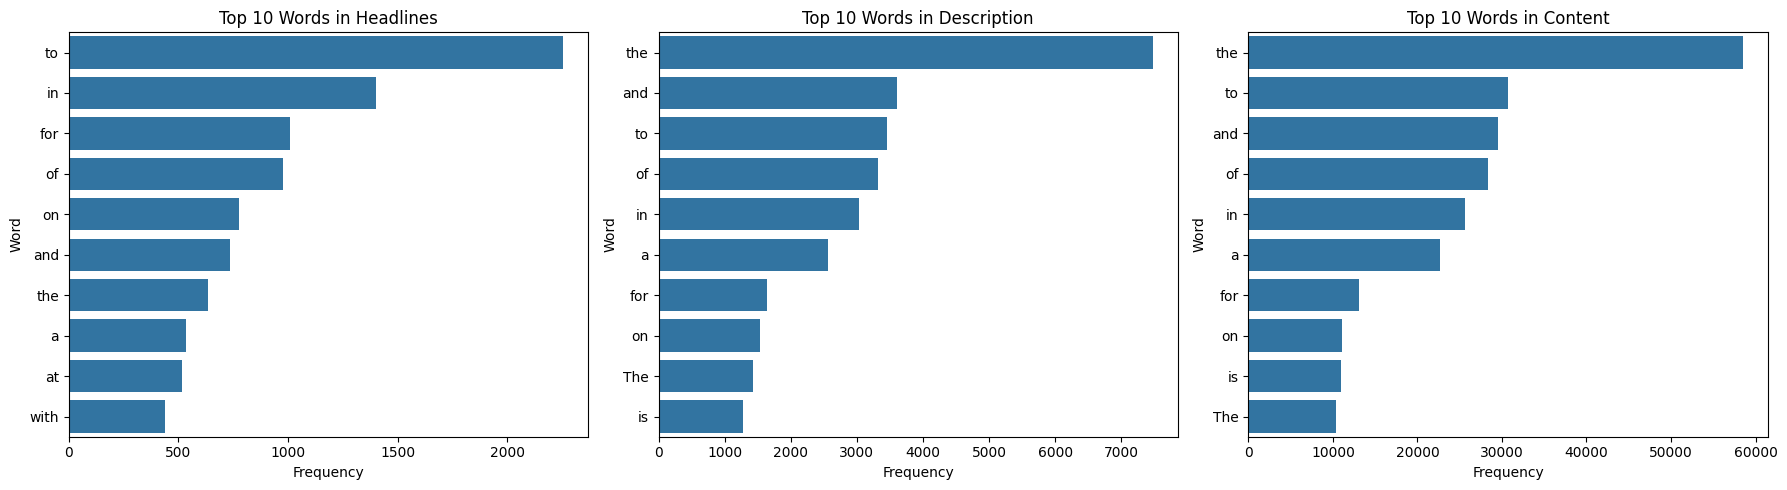

In [126]:
# Visualize the top 10 most frequent words in each column
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Frequency', y='Word', data=headlines_freq_df.head(10))
plt.title('Top 10 Words in Headlines')

plt.subplot(1, 3, 2)
sns.barplot(x='Frequency', y='Word', data=description_freq_df.head(10))
plt.title('Top 10 Words in Description')

plt.subplot(1, 3, 3)
sns.barplot(x='Frequency', y='Word', data=content_freq_df.head(10))
plt.title('Top 10 Words in Content')

plt.tight_layout()
plt.show()

## Adding Text Length Columns
#### First, let's calculate the lengths of the text in the 'headlines', 'description', and 'content' columns and add them to the DataFrame:

In [127]:
# Calculate the length of text in each column
train_df_copy['headline_length'] = train_df_copy['headlines'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

## Distribution of Categories
#### This count plot shows the frequency of each category in the dataset.

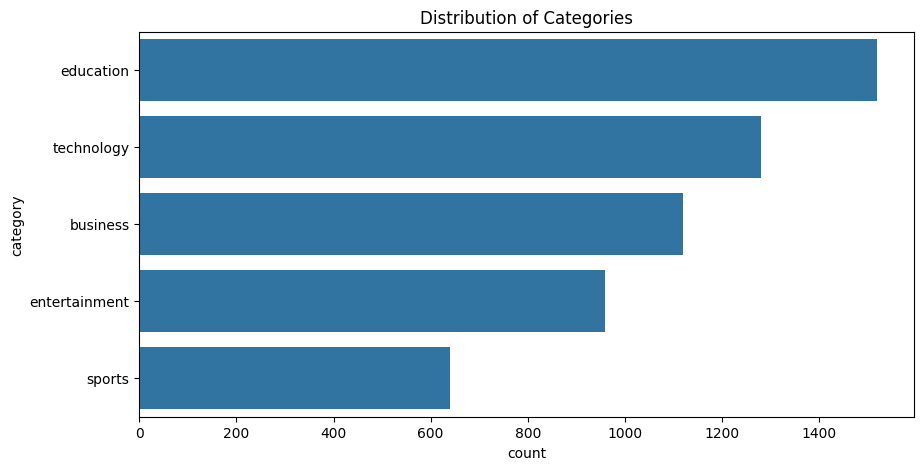

In [128]:
# Plotting the distribution of categories
plt.figure(figsize=(10, 5))
sns.countplot(y='category', data=train_df_copy, order=train_df_copy['category'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()

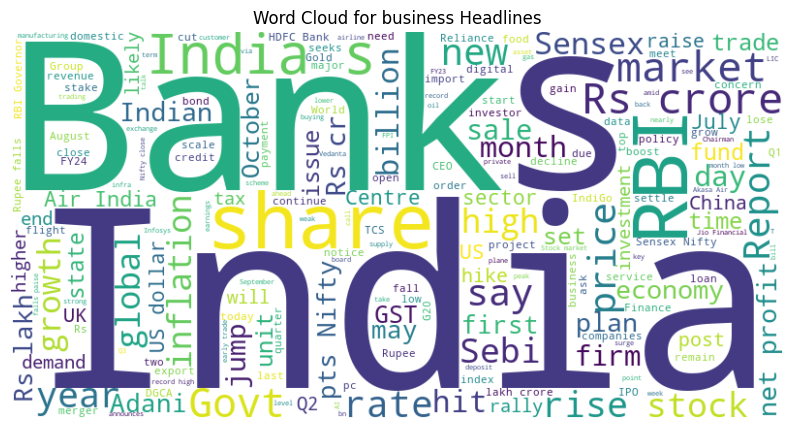

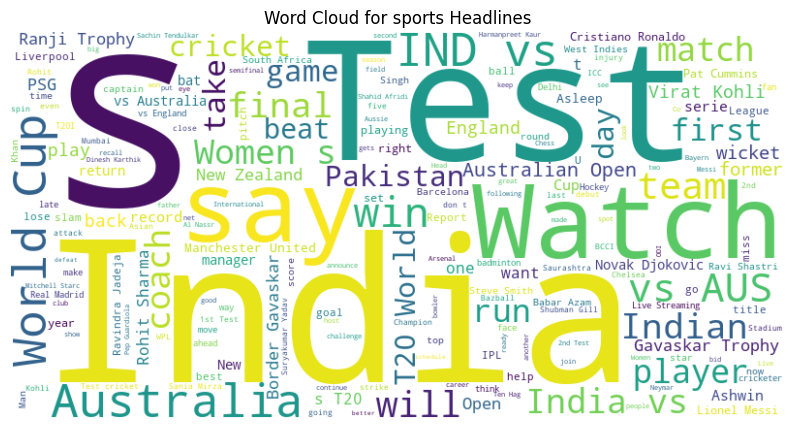

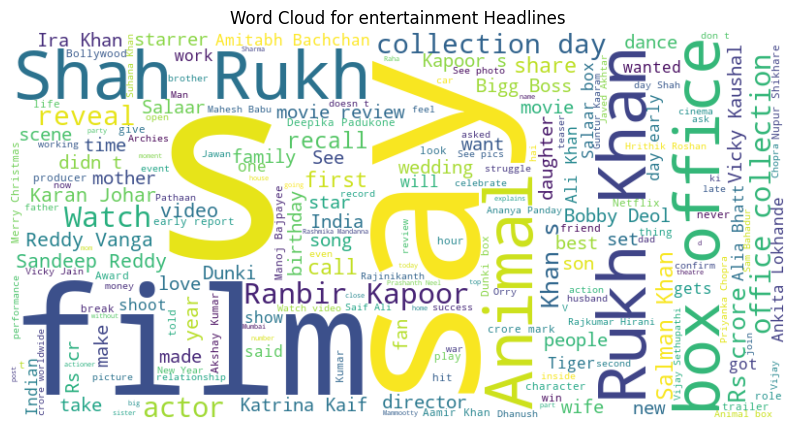

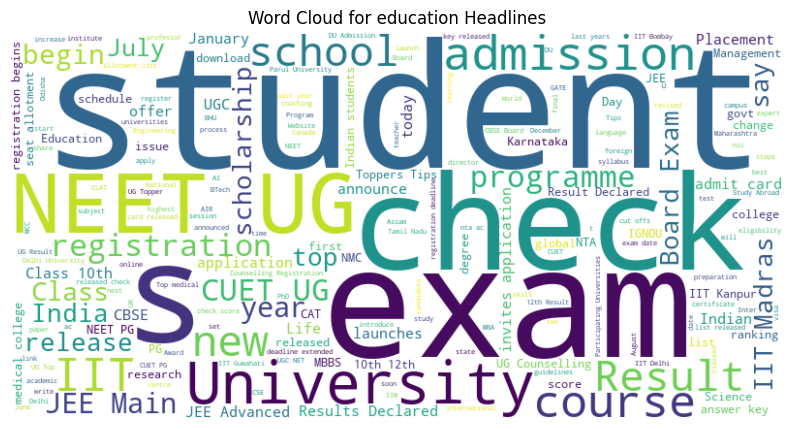

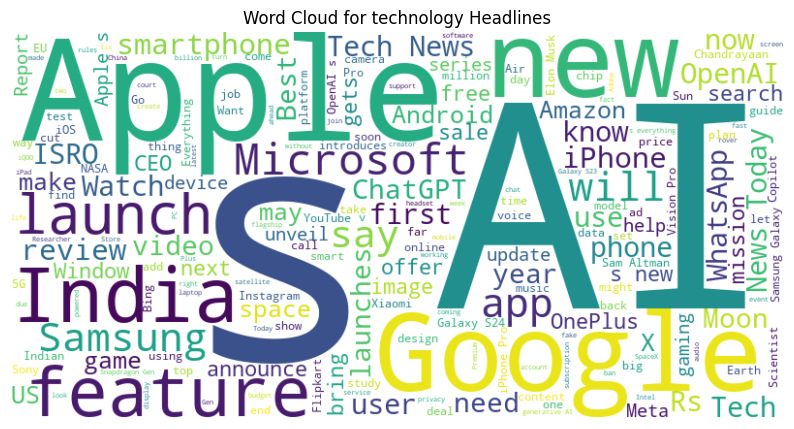

In [146]:
# Generate word clouds for headlines, descriptions, and content for each category
categories = train_df_copy['category'].unique()
for category in categories:
    subset = train_df_copy[train_df_copy['category'] == category]

for category in categories:
    subset = train_df_copy[train_df_copy['category'] == category]
    
    text = ' '.join(subset['headlines'].tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Headlines')
    plt.show()


## Correlation Matrix

This visualization helps to understand the relationships between numerical variables.

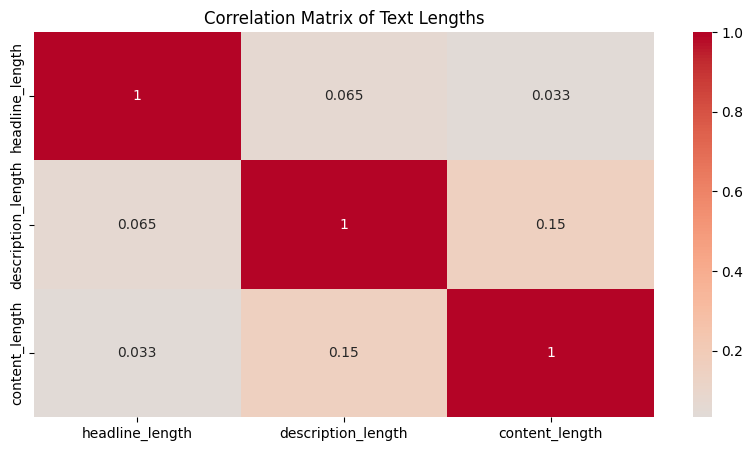

In [129]:
# Plotting correlation matrix
plt.figure(figsize=(10, 5))
correlation_matrix = train_df_copy[['headline_length', 'description_length', 'content_length']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Text Lengths')
plt.show()

## Box Plots for Text Lengths
#### Box plots display the distribution of text lengths and highlight the presence of outliers for the 'headlines', 'description', and 'content' columns.

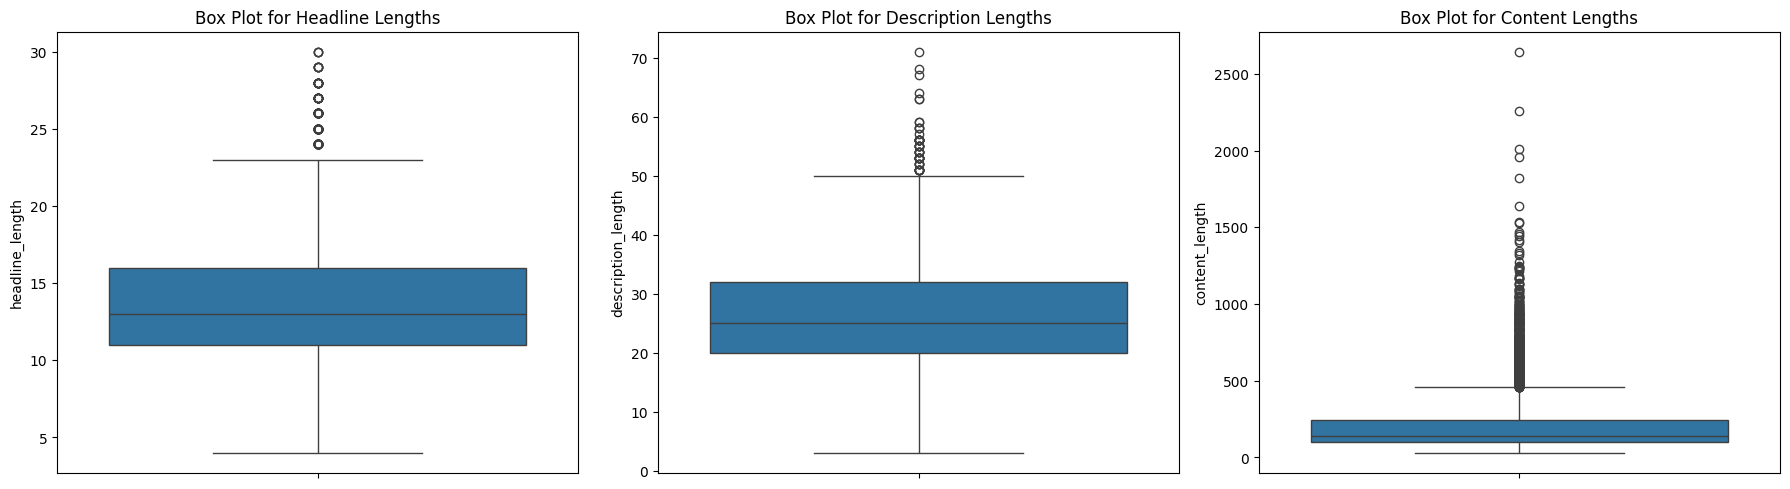

In [130]:
# Box plot for headline lengths
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=train_df_copy['headline_length'])
plt.title('Box Plot for Headline Lengths')

plt.subplot(1, 3, 2)
sns.boxplot(y=train_df_copy['description_length'])
plt.title('Box Plot for Description Lengths')

plt.subplot(1, 3, 3)
sns.boxplot(y=train_df_copy['content_length'])
plt.title('Box Plot for Content Lengths')

plt.tight_layout()
plt.show()

## Pair Plot of Text Lengths
#### Pair plots visualize the pairwise relationships between the lengths of text in 'headlines', 'description', and 'content'.

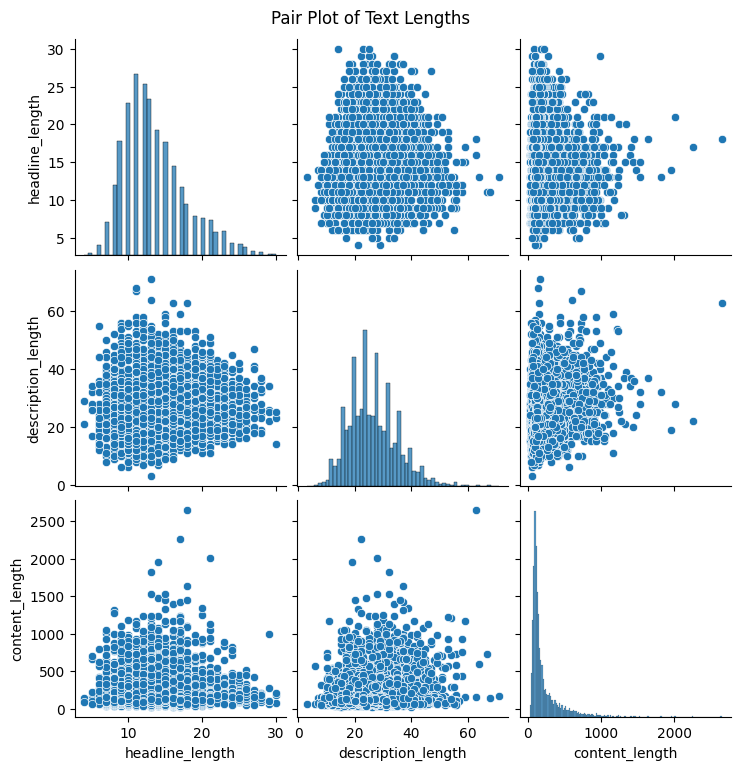

In [131]:
# Pair Plot of Text Lengths
sns.pairplot(train_df_copy[['headline_length', 'description_length', 'content_length']])
plt.suptitle('Pair Plot of Text Lengths', y=1.02)
plt.show()

##### Text Length Distribution by Category
##### Analyze the distribution of text length across different categories:

In [132]:
# Add columns for text length
train_df_copy['headlines_length'] = train_df_copy['headlines'].apply(lambda x: len(str(x).split()))
train_df_copy['description_length'] = train_df_copy['description'].apply(lambda x: len(str(x).split()))
train_df_copy['content_length'] = train_df_copy['content'].apply(lambda x: len(str(x).split()))

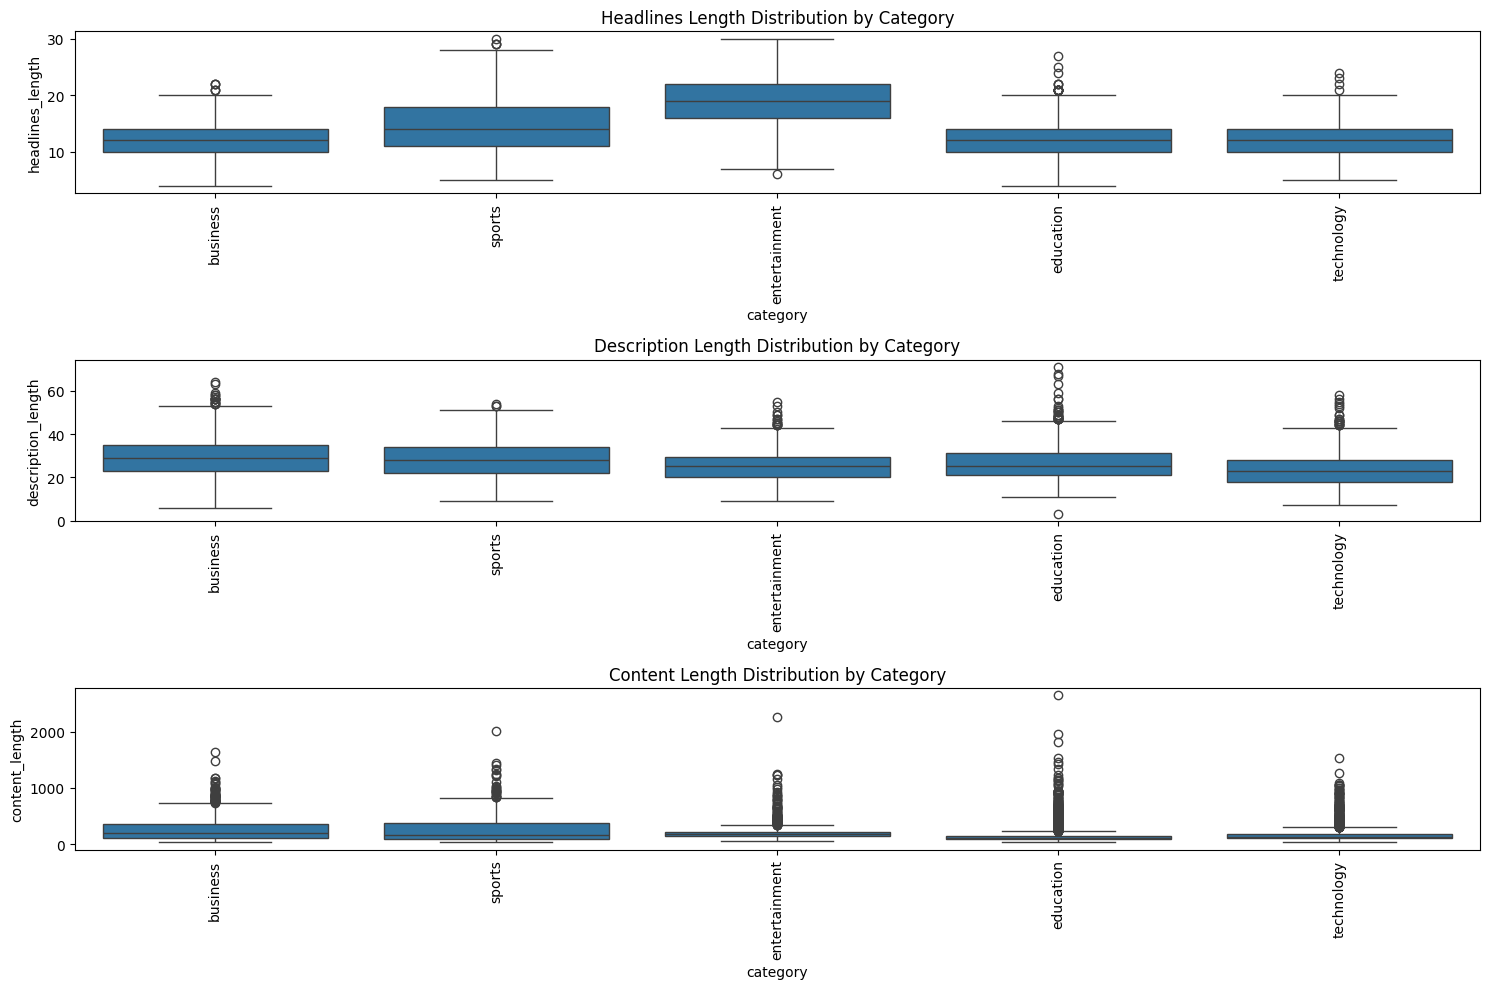

In [133]:
# Plot text length distribution by category
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
sns.boxplot(x='category', y='headlines_length', data=train_df_copy)
plt.title('Headlines Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 2)
sns.boxplot(x='category', y='description_length', data=train_df_copy)
plt.title('Description Length Distribution by Category')
plt.xticks(rotation=90)

plt.subplot(3, 1, 3)
sns.boxplot(x='category', y='content_length', data=train_df_copy)
plt.title('Content Length Distribution by Category')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### <a href=#cont>Back to Table of Contents</a>

---

## 6.Data Preprocessing <a class="anchor" id="chapter6"></a>

In [134]:
# We combine 'headlines', 'description', and 'content' into one column called 'combined_text'. 
# To ensure that all the text data is utilized.
train_df_copy['combined_text'] = train_df_copy['headlines'] + ' ' + train_df_copy['description'] + ' ' + train_df_copy['content']

In [135]:
# converting the text data into numerical features.
tfidf = TfidfVectorizer(max_features=5000)

# Transforming the combined text data
X = tfidf.fit_transform(train_df_copy['combined_text']).toarray()
y = train_df_copy['category']

In [136]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9782608695652174
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       245
    education       0.99      0.99      0.99       274
entertainment       0.97      0.99      0.98       178
       sports       0.98      0.99      0.98       137
   technology       0.97      0.97      0.97       270

     accuracy                           0.98      1104
    macro avg       0.98      0.98      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



In [138]:
# Initialize and train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9809782608695652
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       245
    education       0.99      0.99      0.99       274
entertainment       0.98      0.98      0.98       178
       sports       0.99      0.99      0.99       137
   technology       0.97      0.98      0.97       270

     accuracy                           0.98      1104
    macro avg       0.98      0.98      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



In [139]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Model
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9565217391304348
Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.95      0.95       245
    education       0.98      1.00      0.99       274
entertainment       0.99      0.92      0.95       178
       sports       0.98      0.95      0.97       137
   technology       0.90      0.95      0.93       270

     accuracy                           0.96      1104
    macro avg       0.96      0.95      0.96      1104
 weighted avg       0.96      0.96      0.96      1104



In [140]:
# Initialize KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Train the Model
knn_model.fit(X_train, y_train)

# Make Predictions
y_pred = knn_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9719202898550725
Classification Report:
               precision    recall  f1-score   support

     business       0.95      0.96      0.96       245
    education       0.99      0.99      0.99       274
entertainment       0.96      1.00      0.98       178
       sports       0.96      0.97      0.97       137
   technology       0.98      0.95      0.96       270

     accuracy                           0.97      1104
    macro avg       0.97      0.97      0.97      1104
 weighted avg       0.97      0.97      0.97      1104



In [141]:
# Initialize SVM Classifier
svm_model = SVC(kernel='linear')  # Linear kernel is often used for text classification

# Train the Model
svm_model.fit(X_train, y_train)

# Make Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Accuracy: 0.9836956521739131
Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       245
    education       0.99      0.99      0.99       274
entertainment       0.99      0.99      0.99       178
       sports       0.98      1.00      0.99       137
   technology       0.98      0.97      0.98       270

     accuracy                           0.98      1104
    macro avg       0.98      0.99      0.98      1104
 weighted avg       0.98      0.98      0.98      1104



#### <a href=#cont>Back to Table of Contents</a>

---

## 7.Model Tuning<a class="anchor" id="chapter7"></a>

#### <a href=#cont>Back to Table of Contents</a>

---

## 8.Conclusion <a class="anchor" id="chapter8"></a>

## 9.References <a class="anchor" id="chapter9"></a>

#### <a href=#cont>Back to Table of Contents</a>

---